In [1]:
import numpy as np
from numpy import genfromtxt

In [2]:
data = genfromtxt('ds4_train.csv', delimiter = ',')

In [3]:
data

array([[           nan,            nan,            nan,            nan,
                   nan],
       [1.00000000e+00, 0.00000000e+00, 9.92047489e-01, 3.25741023e-01,
        2.46309700e+06],
       [0.00000000e+00, 1.00000000e+00, 4.70463455e-01, 3.71865779e-01,
        6.45481000e+05],
       ...,
       [0.00000000e+00, 1.00000000e+00, 5.73173404e-01, 4.28406119e-01,
        1.01600200e+06],
       [0.00000000e+00, 1.00000000e+00, 6.01166368e-01, 9.49114740e-01,
        1.06203150e+07],
       [0.00000000e+00, 1.00000000e+00, 3.24601442e-01, 4.05094981e-01,
        5.58245000e+05]])

In [4]:
X= data[:,[0,1,2,3]]
Y = data[:,[4]]

In [5]:
X = np.delete(X,0,0)
Y = np.delete(Y,0,0)

In [6]:
g = lambda x : np.exp(x)

In [7]:
m,n = X.shape

In [18]:
theta0 = np.matrix(np.zeros(n)).T

In [19]:

theta = None

In [10]:
 def J(theta):
        return (1/m)*(X.T*(Y - g(X*theta)))

In [ ]:

#grad = (X.T*(Y - g(X*theta)))/m
#grad

In [ ]:
#theta = theta0 + 0.0000001*(grad)

In [ ]:
#theta

In [ ]:
#np.linalg.norm(theta - theta, ord=1)

In [20]:
TOL = np.power(10.,-5)
lam = 0.0000001
counter = 0

for i in range(100000):
    theta = theta0
    counter += 1
    #grad = (X.T*(Y - g(X*theta)))/m
    theta0 = theta + lam*J(theta)
    
    if np.linalg.norm(theta0 - theta, ord=1) < TOL:
        break
  
    
print('iter =',counter)
print(theta)


iter = 2008
[[11.29934723]
 [10.7993289 ]
 [ 2.00026095]
 [ 4.40057825]]


In [30]:
def predict(x):
        g = lambda x: np.exp(x)
        return g(x*theta)

In [22]:
val_data = genfromtxt('ds4_valid.csv', delimiter = ',')

In [23]:
X_val= val_data[:,[0,1,2,3]]
Y_val = val_data[:,[4]]

In [24]:
X_val = np.delete(X,0,0)
Y_val = np.delete(Y,0,0)

In [25]:
X_val

array([[0.        , 1.        , 0.47046345, 0.37186578],
       [0.        , 1.        , 0.49653283, 0.28985262],
       [0.        , 1.        , 0.1963769 , 0.69467223],
       ...,
       [0.        , 1.        , 0.5731734 , 0.42840612],
       [0.        , 1.        , 0.60116637, 0.94911474],
       [0.        , 1.        , 0.32460144, 0.40509498]])

In [26]:
Y_val

array([[  645481.],
       [  474123.],
       [ 1542136.],
       ...,
       [ 1016002.],
       [10620315.],
       [  558245.]])

In [31]:
y_preds = predict(X_val)

In [48]:
y_preds

matrix([[  644869.36235298],
        [  473564.43140029],
        [ 1542775.22156725],
        ...,
        [ 1015670.89060742],
        [10622364.44191278],
        [  557528.35965192]])

In [33]:
import matplotlib.pyplot as plt 

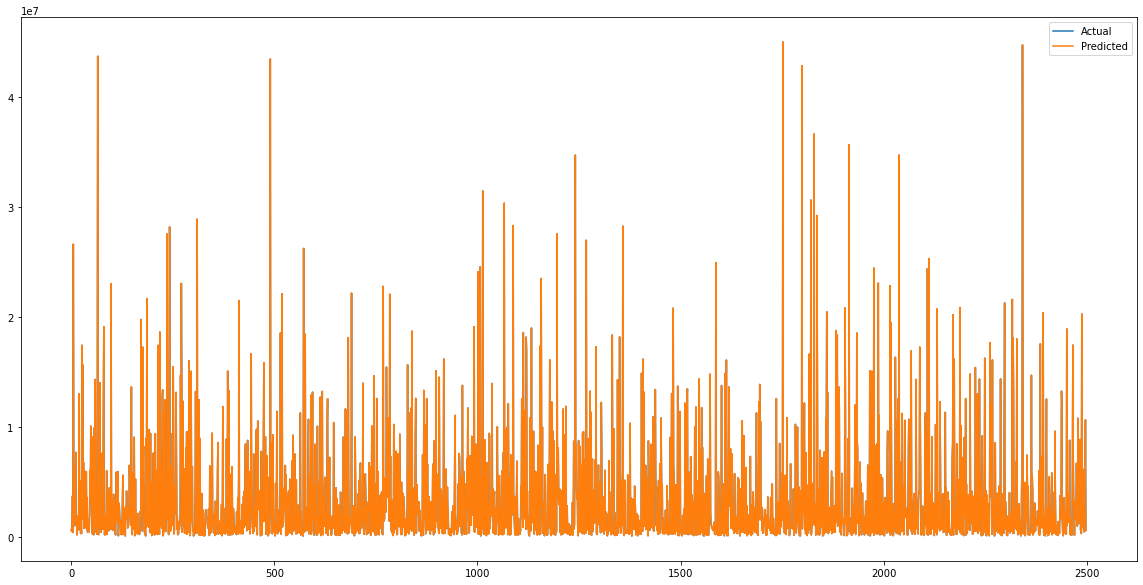

In [49]:
plt.figure(figsize = (20,10))
plt.plot(Y_val, label='Actual')
plt.plot(y_preds, label='Predicted')

plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error

In [51]:
(Y_val - y_preds).sum() / M

60.95057159186023